In [2]:
# IGNORE THIS CELL WHICH CUSTOMIZES LAYOUT AND STYLING OF THE NOTEBOOK !
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings = lambda *a, **kw: None

# Exercise 1.4 - Multiple plots per figure
prepared by M.Hauser

Until now we used only one axes per figure. However you may want to add several subplots in the same figure. 
As mentioned earlier, it is possible to have more than one axes per figure in matplotlib.

In [4]:
import matplotlib.pyplot as plt
import numpy as np

## `plt.subplots` - simple grids

Until now, we used `plt.subplots()` (notice the `s` at the end) to create a single axes, but it supports the `nrows` and `ncol` keywords to create regular grids.



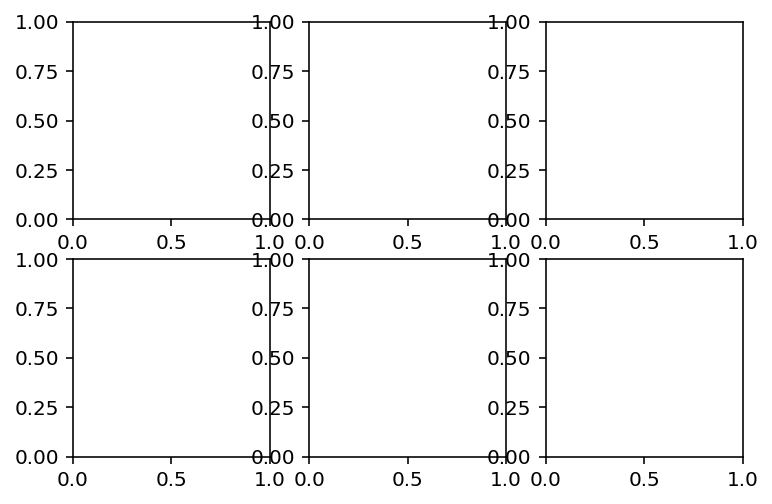

In [5]:
f, axes = plt.subplots(2, 3)

## `hspace` and `wspace`

This looks ok, but there is not enough space between the axes for the labels. You can adjust the space between the axes manually with `hspace` and `wspace` (`h` and `w` stands for heigth and width). Note that `hspace` and `wspace` are properties of the GridSpec (discussed later), so we have to pass it as `gridspec_kw`.

 * `wspace` the amount of width reserved for blank space between subplots, expressed as a fraction of the average axis width, default value = 0.2
 * `hspace`: the amount of height reserved for white space between subplots,  expressed as a fraction of the average axis height, default value = 0.2

(The bullet points are from the documentation, don't ask me what the difference between white and blank space is...)

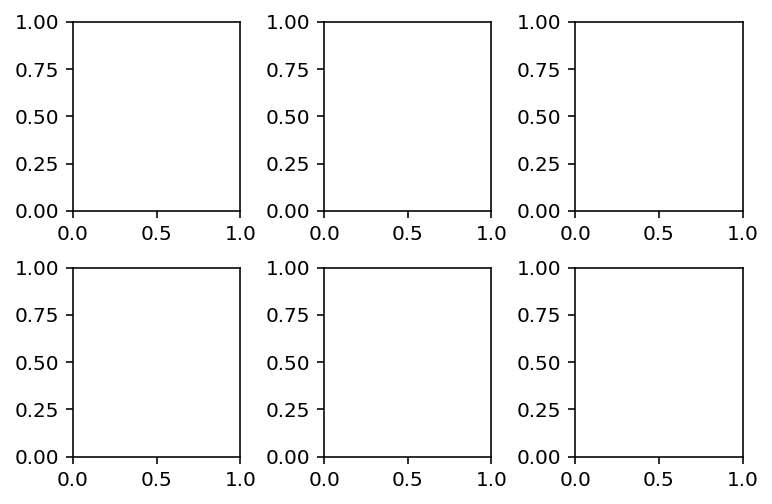

In [6]:
f, axes = plt.subplots(2, 3, gridspec_kw=dict(hspace=0.3, wspace=0.5))

Note that `hspace` and `wspace` are relative measures:

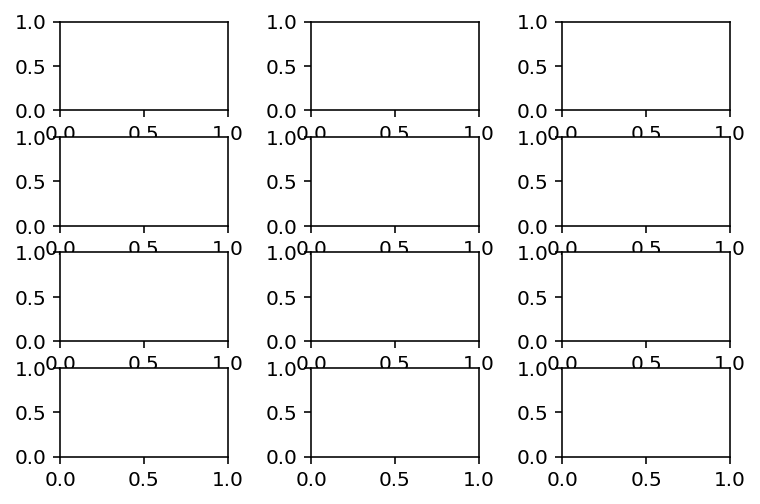

In [7]:
f, axes = plt.subplots(4, 3, gridspec_kw=dict(hspace=0.3, wspace=0.5))

Alternatively, you can tell matplotlib to adjust the distances automatically. However, this may not always work (or may not work as you wish).

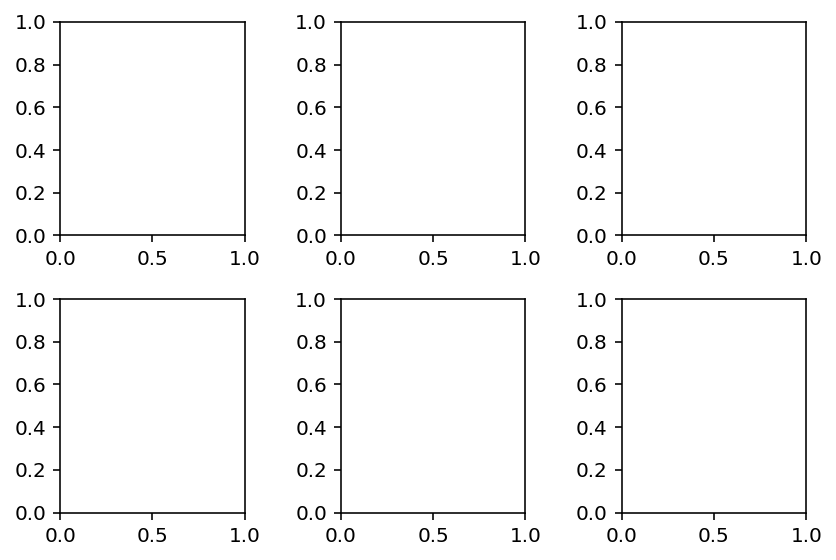

In [8]:
f, axes = plt.subplots(2, 3)

f.tight_layout()

The axes can also share the x and y axis. This automatically removes the inner x and y ticks. 

Note that when sharing the axis, setting the x or y limit for one axes adjusts them for all the axes.

(-0.5, 0.5)

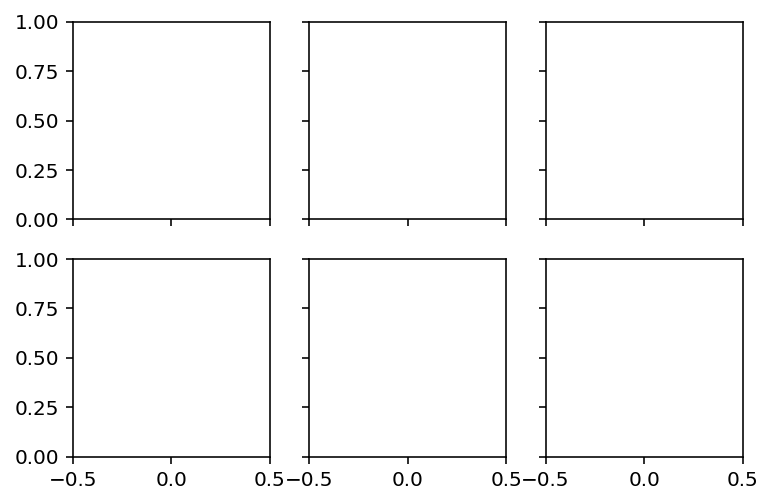

In [11]:
f, axes = plt.subplots(2, 3, sharex=True, sharey=True)

ax = axes[0, 0]

ax.set_xlim(-0.5, 0.5)

Note the x-axis.



If you have more than one column and more than one row of axes, `axes` is a 2D array.

In [12]:
print(axes.shape)

axes

(2, 3)


array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

Let's see the order of the axes in the array:

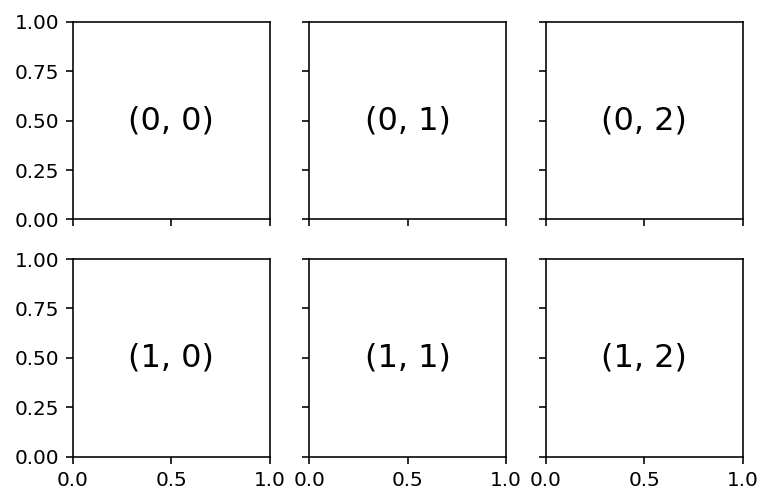

In [13]:
f, axes = plt.subplots(2, 3, sharex=True, sharey=True)

# axes are in a two-dimensional array, indexed by [row, col]
for i in range(2):
    for j in range(3):
        axes[i, j].text(0.5, 0.5, str((i, j)), fontsize=16, ha='center', va='center')

Because I don't find it very convenient to address the axes as `axes[i, j]` I often `flatten` them to a 1D array.

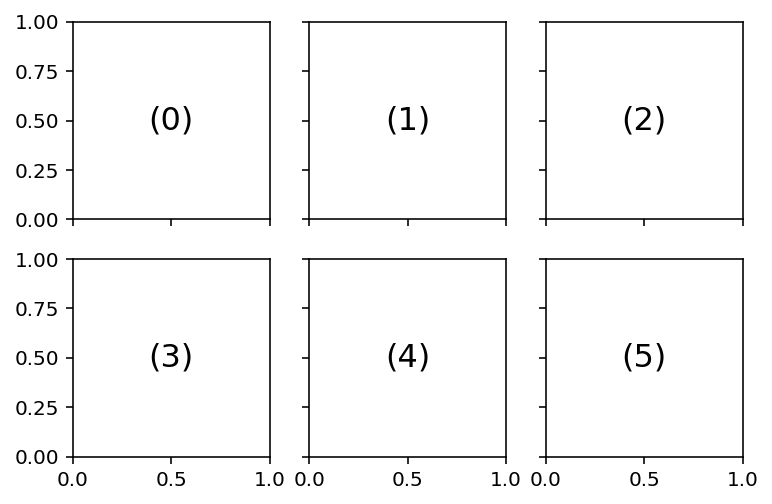

In [14]:
f, axes = plt.subplots(2, 3, sharex=True, sharey=True)

axes = axes.flatten()

# axes are now in a one-dimensional array, indexed by [index]
for i, ax in enumerate(axes):
    ax.text(0.5, 0.5, '({})'.format(i), fontsize=16, ha='center', va='center')

## `plt.axes` - adding axes by hand

Axes can also be added by `plt.axes`. 

* `ax = plt.axes()`

Using `ax = plt.axes()` creates the same axes object as `f, ax = plt.subplots(1, 1)`, but it does not return the figure handle (`f`). 

* `ax = plt.axes(rect)`

With `ax = plt.axes(rect)` you can also specify the position of the new axes. The argument `rect` needs to have the form `rect = [left, bottom, width, height]`. The positions are given in the figure coordinate system, which ranges from 0 at the bottom left of the figure to 1 at the top right of the figure.

So to create an inset at the top right corner we could for example do.

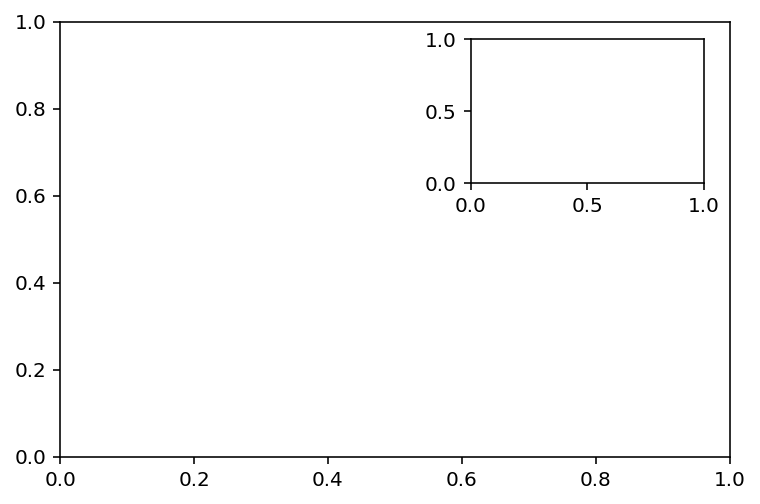

In [16]:
ax1 = plt.axes()
ax2 = plt.axes([0.6, 0.6, 0.27, 0.25])

As mentioned in the presentation: ax1 and ax2 are instances of plt.Axes, but only ax1 is a Subplot.

In [17]:
print(ax1, isinstance(ax1, plt.Axes), isinstance(ax1, plt.Subplot))
print(ax2, '            ', isinstance(ax2, plt.Axes), isinstance(ax2, plt.Subplot))

AxesSubplot(0.125,0.125;0.775x0.755) True True
Axes(0.6,0.6;0.27x0.25)              True False


## `plt.Gridspec` - arbitrary grids

If you need axes that are not all of the same size but are irregular, i.e. may span several rows and/or columns, you  can create them with `plt.GridSpec`. This is a 2-step process, you first need to create a grid by calling `grid = plt.GridSpec(nrows, ncols)` and then create the single axes with `plt.subplot`.


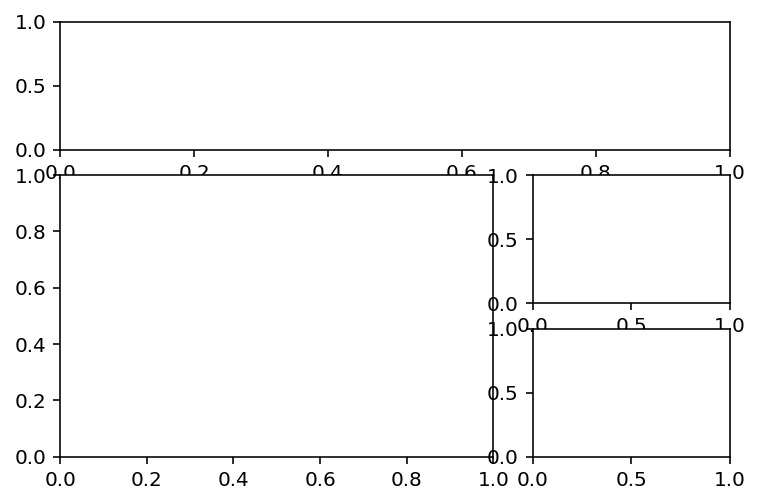

In [18]:
# create grid
grid = plt.GridSpec(3, 3)

ax1 = plt.subplot(grid[0, :])
ax2 = plt.subplot(grid[1:3, :2])
ax3 = plt.subplot(grid[1, 2]);
ax4 = plt.subplot(grid[2, 2]);

Here you can specify `hspace` and `wspace` directly: 

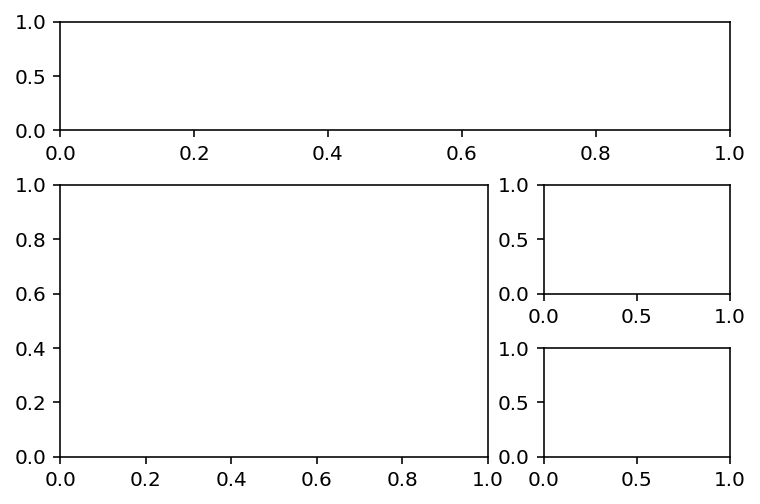

In [19]:
# create grid
grid = plt.GridSpec(3, 3, hspace=0.5, wspace=0.3)

ax1 = plt.subplot(grid[0, :])
ax2 = plt.subplot(grid[1:3, :2])
ax3 = plt.subplot(grid[1, 2]);
ax4 = plt.subplot(grid[2, 2]);

`tight_layout` also works:

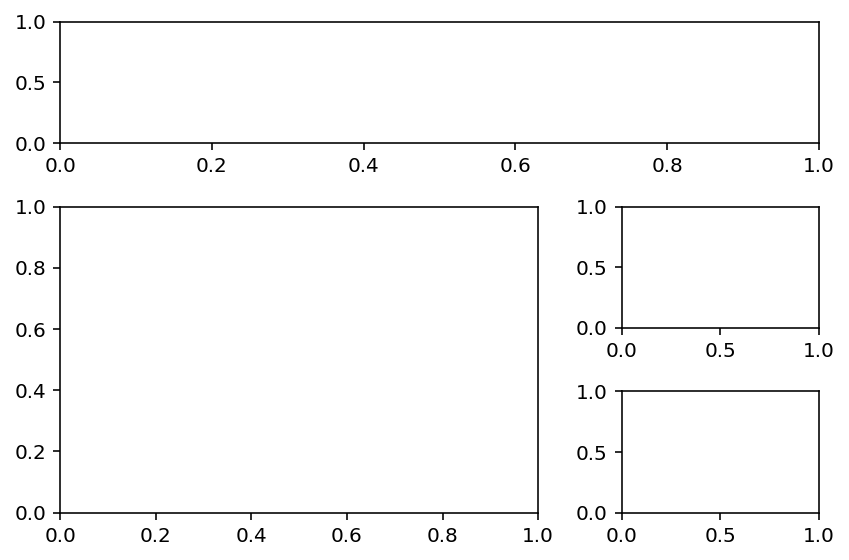

In [20]:
# create grid
grid = plt.GridSpec(3, 3)

ax1 = plt.subplot(grid[0, :])
ax2 = plt.subplot(grid[1:3, :2])
ax3 = plt.subplot(grid[1, 2]);
ax4 = plt.subplot(grid[2, 2]);

plt.tight_layout()


## Exercises



### Load Data

We will again use the station data (Temperature & Precip) for Switzerland, but this time we will use the time series instead of the climatology.

The data is available from MeteoSwiss.

The data has already been [retrieved and postprocessed](../data/prepare_data_MCH.ipynb).

In [21]:
import netCDF4 as nc

import xarray as xr

In [22]:
def load_mch(station, annual=True):
    fN = '../data/MCH_HOM_{}.nc'.format(station)
    ds = xr.open_dataset(fN, drop_variables=['station', 'station_long'])
    
    if annual:
        # create annual data
        ds = ds.groupby('time.year').mean('time')

    return ds
    

BAS = load_mch('BAS')
BER = load_mch('BER')
GSB = load_mch('GSB')
DAV = load_mch('DAV')

LUG_monthly = load_mch('LUG', False)
ENG_monthly = load_mch('ENG', False)


/home/chadhat/miniconda3/envs/pyvis/lib/python3.8/site-packages/xarray/core/nanops.py:141: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/chadhat/miniconda3/envs/pyvis/lib/python3.8/site-packages/xarray/core/nanops.py:141: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/chadhat/miniconda3/envs/pyvis/lib/python3.8/site-packages/xarray/core/nanops.py:141: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/chadhat/miniconda3/envs/pyvis/lib/python3.8/site-packages/xarray/core/nanops.py:141: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/chadhat/miniconda3/envs/pyvis/lib/python3.8/site-packages/xarray/core/nanops.py:141: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/chadhat/miniconda3/envs/pyvis/lib/python3.8/site-packages/xarray/core/nanops.py:141: RuntimeWarning: Mean of empty slice
  r

### Exercise

 * create a grid of Axes with 4 rows and 1 column
 * populate the axes with the annual mean temperature of four stations
   > ax.plot(BAS.year, BAS.Temperature)
 * loop through the axes to add `"T [°C]"` as the ylabel.
 * add the station names as titles (set loc='left')

In [23]:
# code here

station_names = ('BAS', 'BER', 'GSB', 'DAV')

# use this code to loop through the axes and station_names
# for i, ax in enumerate(axes):
#    station_names[i]


### Solution

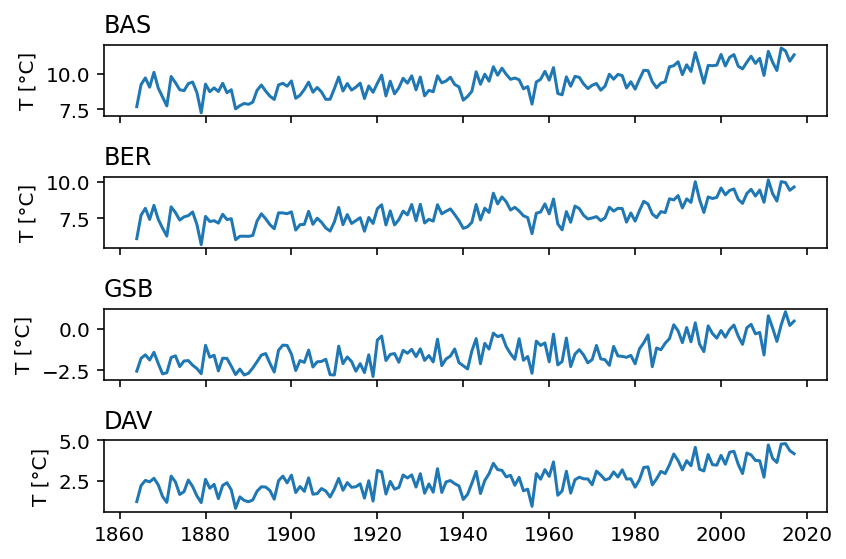

In [24]:
f, axes = plt.subplots(4, 1, sharex=True)

ax = axes[0]
ax.plot(BAS.year, BAS.Temperature)

ax = axes[1]
ax.plot(BER.year, BER.Temperature)

ax = axes[2]
ax.plot(GSB.year, GSB.Temperature)

ax = axes[3]
ax.plot(DAV.year, DAV.Temperature)

station_names = ('BAS', 'BER', 'GSB', 'DAV')

for i, ax in enumerate(axes):
    ax.set_ylabel("T [°C]")

    ax.set_title(station_names[i], loc='left')
    
    
f.tight_layout()

### Exercise
Use the following code and
 * add an axes in the top left corner
 * add the data for the years 2000 to 2010 (`BAS_sel`)
 * test what happens if you use `f.tight_layout()`

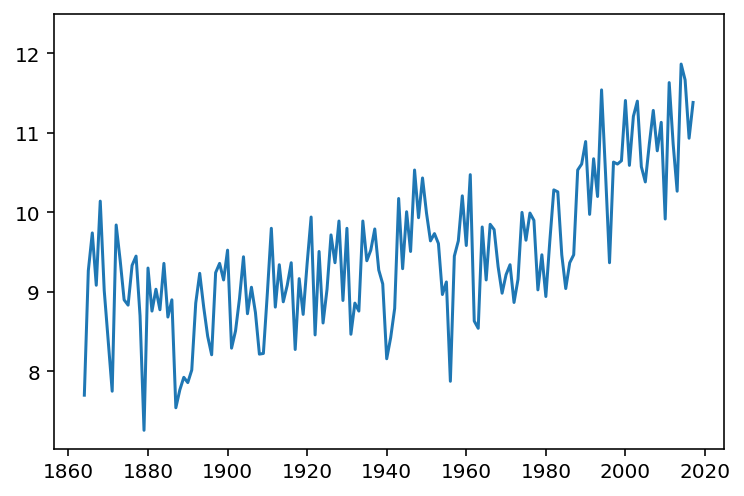

In [25]:
f, axes = plt.subplots(1, 1, sharex=True)

ax = axes
ax.plot(BAS.year, BAS.Temperature)

ax.set_ylim(None, 12.5)

BAS_sel = BAS.sel(year=slice(2000, 2010))

# code here


### Solution

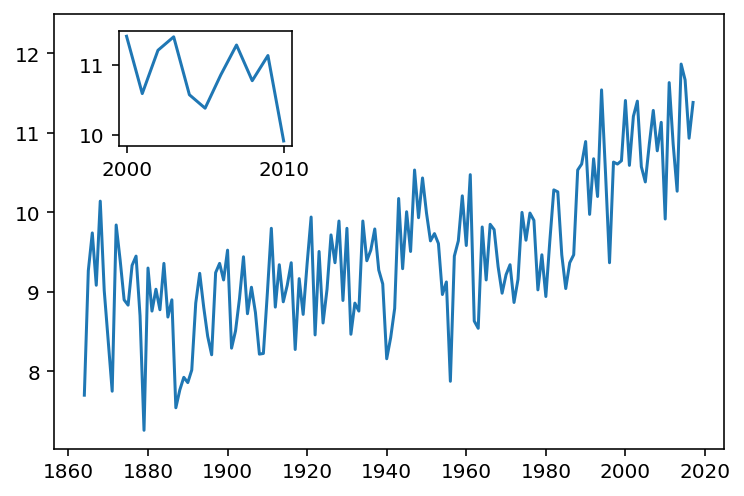

In [26]:
f, axes = plt.subplots(1, 1, sharex=True)

ax = axes
ax.plot(BAS.year, BAS.Temperature)

ax.set_ylim(None, 12.5)

BAS_sel = BAS.sel(year=slice(2000, 2010))

# code here

ax2 = plt.axes([0.2, 0.65, 0.2, 0.20])

ax2.plot(BAS_sel.year, BAS_sel.Temperature)

# f.tight_layout()

### Exercise

 * use `plt.Gridspec` to create two axes, one that takes ~ 3/4 of the width and the other ~ 1/4
 * Bonus
   * plot precipitation data time series of BAS in the left axes
   * plot a histogram of the same data in the right axes (Hint: `ax1.hist(BAS.Precipitation, 10, orientation='horizontal', density=True);`)

In [27]:
# code here

### Solution

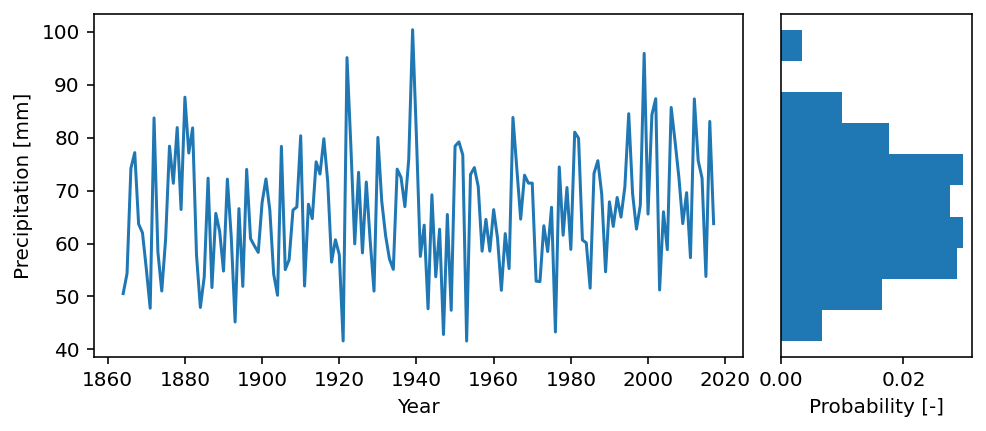

In [28]:
f = plt.figure(figsize=(20 / 2.54, 8 / 2.54))

# create grid
grid = plt.GridSpec(1, 4)

ax0 = plt.subplot(grid[0, :3])

ax1 = plt.subplot(grid[0, 3])

ax1.set_yticks([])

ax0.plot(BAS.year, BAS.Precipitation)
ax1.hist(BAS.Precipitation, 10, orientation='horizontal', density=True);

ax0.set_ylabel('Precipitation [mm]');

ax0.set_xlabel('Year');
ax1.set_xlabel('Probability [-]');

### Bonus Exercise

 * Try to understand the following code:

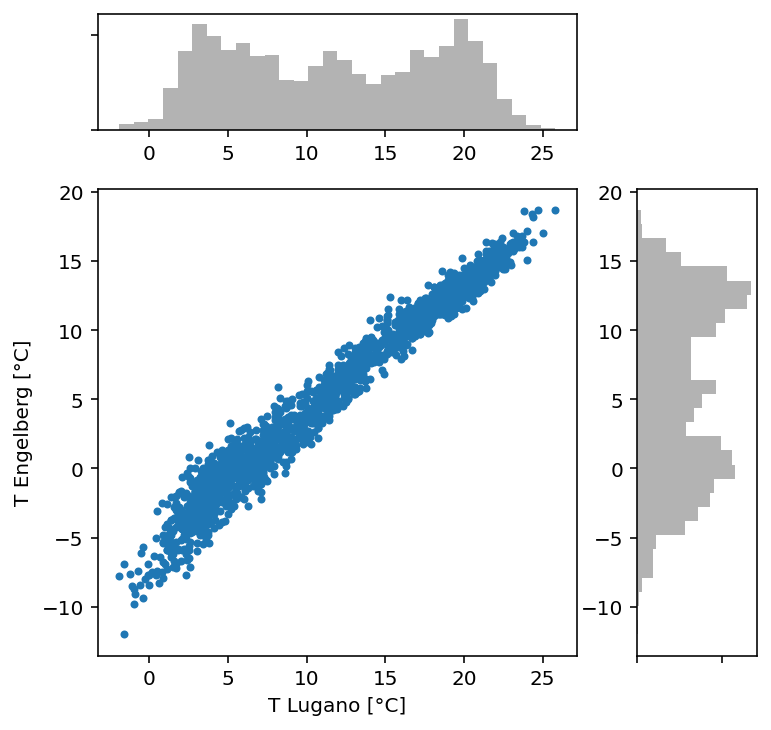

In [29]:
# get data
x = LUG_monthly.Temperature
y = ENG_monthly.Temperature

f = plt.figure(figsize=(15 / 2.54, 15 / 2.54))

grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.5)

main_ax = plt.subplot(grid[1:, :-1])

y_hist = plt.subplot(grid[1:, -1], xticklabels=[], sharey=main_ax)
x_hist = plt.subplot(grid[0, :-1], yticklabels=[], sharex=main_ax)

main_ax.plot(x, y, '.')

x_hist.hist(x, 30, histtype='stepfilled', orientation='vertical', color='0.7')
y_hist.hist(y, 30, histtype='stepfilled', orientation='horizontal', color='0.7');

main_ax.set_xlabel('T Lugano [°C]')
main_ax.set_ylabel('T Engelberg [°C]');
